# Polynomial Interpolation

## Vandermonde matrix method

In [1]:
import numpy as np
import numpy.linalg as nl
import matplotlib.pyplot as plt

In [2]:
# Define a function to generate Vandermonde matrix
def V(x): 
    n = len(x)  #Vandermonde matrix will be n by n
    V = np.zeros((n,n))
    for i in range(0,n):
        V[:,i] = np.power(x,i)
    return V
#test
x = range(0,3)
print V(x)

[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]]


In [3]:
# Define a function to find the coefficients of polynomial using Vandermonde matrix
def PolyInter(x,y):
    return nl.solve(V(x),y)
#test
x = range(0,3)
y = np.array([1,1,2])
print PolyInter(x,y)

[ 1.  -0.5  0.5]


## Runge function effect

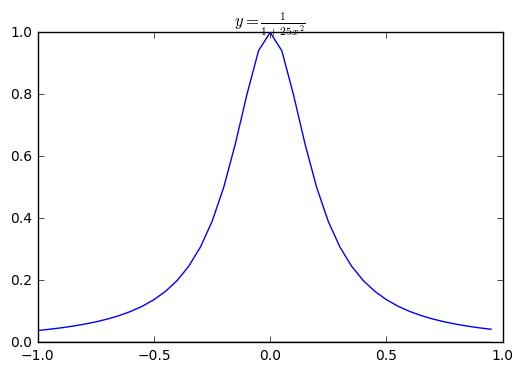

In [5]:
def r(x): return 1/(np.power(5*x,2)+1)
x = np.arange(-1,1,0.05)
plt.plot(x,r(x),x,0*x,'k')
plt.title(r'$y=\frac{1}{1+25x^2}$')
plt.show()

In [6]:
# generate n equally spaced points on interval [a,b], with end points a and b
def GenEquX(a,b,n):
    x = np.arange(0,n)
    x = x.astype(float)
    return  x*(b-a)/(n-1) + a
# test
print GenEquX(-1,1,5)

[-1.  -0.5  0.   0.5  1. ]


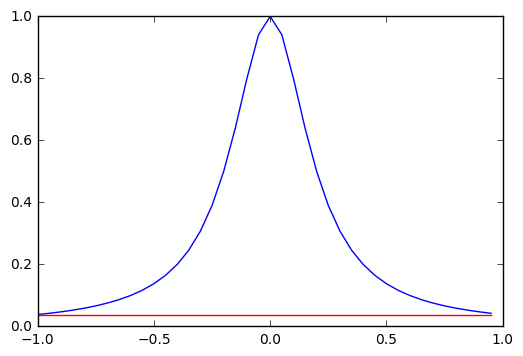

In [7]:
# Interpolate this function with 2 equally spaced x_i's
a = -1
b = 1
x2 = GenEquX(a,b,2)
c2 = PolyInter(x2,r(x2))
x = np.arange(a,b,0.05)
plt.plot(x,r(x),x,c2[0]+c2[1]*x,'r')
plt.show()

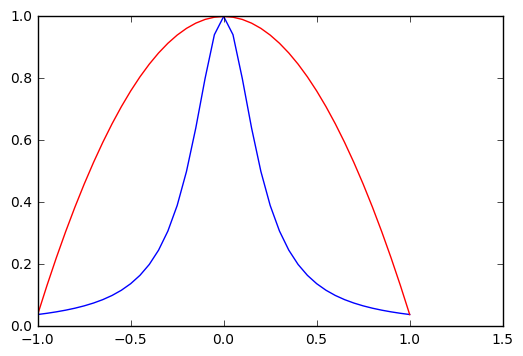

In [8]:
# Interpolate this function with 3 equally spaced x_i's
a = -1
b = 1
x3 = GenEquX(a,b,3)
c3 = PolyInter(x3,r(x3))
x = np.arange(-1,1.05,0.05)

plt.plot(x,r(x),x,c3[0]+c3[1]*x+c3[2]*x**2,'r')
plt.show()

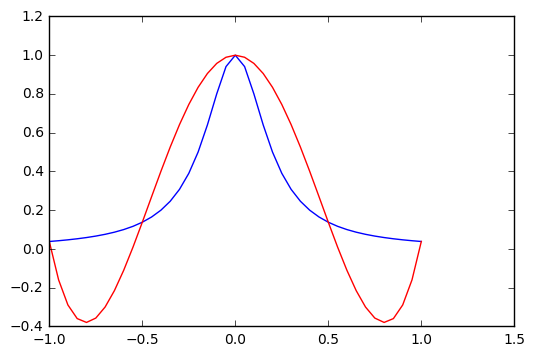

In [9]:
# Interpolate this function with 5 equally spaced x_i's
a = -1
b = 1
x5 = GenEquX(a,b,5)
c5 = PolyInter(x5,r(x5))
x = np.arange(-1,1.05,0.05)
y = np.array([x**0,x**1,x**2,x**3,x**4])
plt.plot(x, r(x), x, np.dot(y.T,c5),'r')
plt.show()

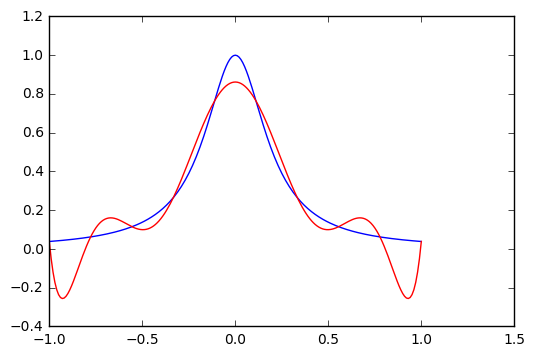

In [10]:
# Interpolate this function with 10 equally spaced x_i's
a=-1
b=1
x10 = GenEquX(a,b,10)
c10 = PolyInter(x10,r(x10))
x = np.arange(-1,1.01,0.01)
y = np.array([x**i for i in range(10)])
plt.plot(x, r(x), x, np.dot(y.T,c10),'r')
plt.show()

In [11]:
# define this polynomial of degree 9
def p9(x):
    vx = np.array([x**i for i in range(10)])
    return np.inner(vx,c10)
print p9(-0.9)

-0.229980686266


## How to measure function difference?

（1） $\|r-p_9\|_{\infty}$

（2） $\|r - p_9\|_2$

In [13]:
def dp9(x): return abs(r(x)-p9(x))**2
from scipy.integrate import quad
d_p9 = quad(dp9, -1,1)
import math
print math.sqrt(d_p9[0])

0.154995078703


## Interpolate at Chebyshev nodes

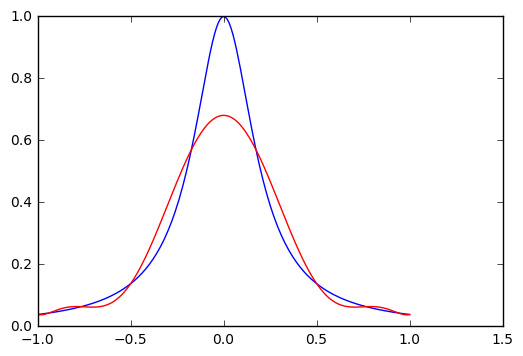

In [14]:
# generate chebyshev nodes 
a = np.arange(0, 10, 1.0)
import math
ch_nodes = np.cos(math.pi*a/9)
c_ch = PolyInter(ch_nodes,r(ch_nodes))
x = np.arange(-1,1.01,0.01)
y = np.array([x**i for i in range(10)])
plt.plot(x, r(x), x, np.dot(y.T,c_ch),'r')
plt.show()

$\|r - ch\|_2$

In [16]:
# define this poly with chebyshev nodes
def ch(x):
    vx = np.array([x**i for i in range(10)])
    return np.inner(vx,c_ch)
def dch(x): return abs(ch(x)-r(x))**2
# quad is taking integration from -1 to 1
d_ch = quad(dch, -1,1)
print math.sqrt(d_ch[0])

0.132414208669


## If there is a choice on nodes (x values of the data points), pick Chebyshev nodes!

## Cubic Spline

<img src="car.png"> <img src="mc.jpg" style="width: 400px;">

In [17]:
from scipy.interpolate import CubicSpline
x10 = GenEquX(-1,1,10)
y10 = r(x10)
cs = CubicSpline (x10, y10)
help(cs)
cs.c

Help on CubicSpline in module scipy.interpolate._cubic object:

class CubicSpline(scipy.interpolate.interpolate.PPoly)
 |  Cubic spline data interpolator.
 |  
 |  Interpolate data with a piecewise cubic polynomial which is twice
 |  continuously differentiable [1]_. The result is represented as a `PPoly`
 |  instance with breakpoints matching the given data.
 |  
 |  Parameters
 |  ----------
 |  x : array_like, shape (n,)
 |      1-d array containing values of the independent variable.
 |      Values must be real, finite and in strictly increasing order.
 |  y : array_like
 |      Array containing values of the dependent variable. It can have
 |      arbitrary number of dimensions, but the length along `axis` (see below)
 |      must match the length of `x`. Values must be finite.
 |  axis : int, optional
 |      Axis along which `y` is assumed to be varying. Meaning that for
 |      ``x[i]`` the corresponding values are ``np.take(y, i, axis=axis)``.
 |      Default is 0.
 |  bc_type

array([[ -1.07295538e+00,  -1.07295538e+00,   1.15718499e+01,
         -2.22323100e+01,  -8.99280650e-15,   2.22323100e+01,
         -1.15718499e+01,   1.07295538e+00,   1.07295538e+00],
       [  1.01044265e+00,   2.95139068e-01,  -4.20164515e-01,
          7.29440210e+00,  -7.52713791e+00,  -7.52713791e+00,
          7.29440210e+00,  -4.20164515e-01,   2.95139068e-01],
       [ -6.55378062e-02,   2.24591465e-01,   1.96808032e-01,
          1.72441638e+00,   1.67269731e+00,  -1.67269731e+00,
         -1.72441638e+00,  -1.96808032e-01,  -2.24591465e-01],
       [  3.84615385e-02,   6.20214395e-02,   1.14730878e-01,
          2.64705882e-01,   7.64150943e-01,   7.64150943e-01,
          2.64705882e-01,   1.14730878e-01,   6.20214395e-02]])

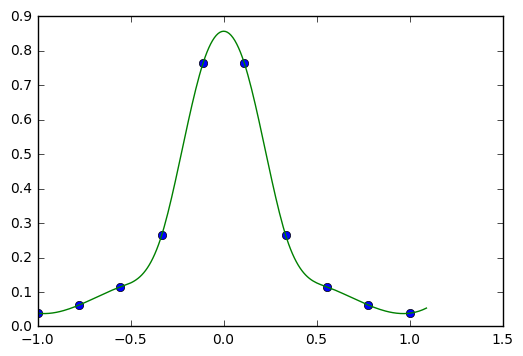

In [18]:
xs = np.arange(-1, 1.1, 0.01)
plt.plot(x10, y10, 'o', label='data')
plt.plot(xs, cs(xs), label="S")
plt.show()

In [20]:
def dcubic(x): return abs(cs(x)-r(x))**2
d_cubic = quad(dcubic, -1,1)
print math.sqrt(d_cubic[0])

0.0579150509888
